Importing required libraries

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp, log

Binary classifier for single feature input data

In [146]:
# Reading data from CSV file, converting into dataframe

data = pd.read_csv('insurance_data.csv', sep=',', names=['X','Y'])
data = data.drop(0,axis=0)

for ind in data.index:
    print(ind, ' Age: ', data['X'][ind], ', Bought Insurance', data['Y'][ind])

1  Age:  22 , Bought Insurance 0
2  Age:  25 , Bought Insurance 0
3  Age:  47 , Bought Insurance 1
4  Age:  52 , Bought Insurance 0
5  Age:  46 , Bought Insurance 1
6  Age:  56 , Bought Insurance 1
7  Age:  55 , Bought Insurance 0
8  Age:  60 , Bought Insurance 1
9  Age:  62 , Bought Insurance 1
10  Age:  61 , Bought Insurance 1
11  Age:  18 , Bought Insurance 0
12  Age:  28 , Bought Insurance 0
13  Age:  27 , Bought Insurance 0
14  Age:  29 , Bought Insurance 0
15  Age:  49 , Bought Insurance 1
16  Age:  55 , Bought Insurance 1
17  Age:  25 , Bought Insurance 1
18  Age:  58 , Bought Insurance 1
19  Age:  19 , Bought Insurance 0
20  Age:  18 , Bought Insurance 0
21  Age:  21 , Bought Insurance 0
22  Age:  26 , Bought Insurance 0
23  Age:  40 , Bought Insurance 1
24  Age:  45 , Bought Insurance 1
25  Age:  50 , Bought Insurance 1
26  Age:  54 , Bought Insurance 1
27  Age:  23 , Bought Insurance 0


In [147]:
# Initializing list of x data and y data

x_list = [[],[]]
y_list = []

# Iterating over the DataFrame to fill the lists with necessary information

for ind in data.index:
    x_list[0].append(1)   # x0 = 1 for all data
    x_list[1].append(float(data['X'][ind]))
    y_list.append(int(data['Y'][ind]))

# Conversion to numpy array

x_arr = np.array(x_list[1])
y_arr = np.array(y_list)

# Printing the data

print(x_arr)
print()
print(y_arr, "\n")

m = len(data)  #number of training examples
print(m,"\n")

n = len(x_list)  #number of parameters
print(n)

[22. 25. 47. 52. 46. 56. 55. 60. 62. 61. 18. 28. 27. 29. 49. 55. 25. 58.
 19. 18. 21. 26. 40. 45. 50. 54. 23.]

[0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0] 

27 

2


Text(0.5, 1.0, 'Insurace Data')

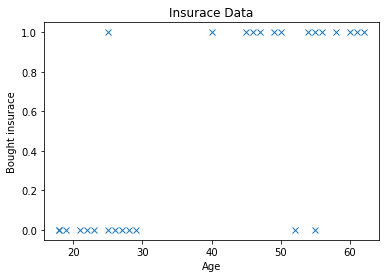

In [148]:
#plot of training data
plt.scatter(x_arr,y_arr,marker='x',linewidths=1)
plt.xlabel("Age")
plt.ylabel("Bought insurace")
plt.title("Insurace Data")

Batch Gradient Ascent

In [149]:
# Hypothesis function

def hypot(theta,x_i):
    ans = (-1)*(theta[0]*x_i[0] + theta[1]*x_i[1])
    return (1/(1+exp(ans)))

In [150]:
# Log likelihood function

def log_likelihood(theta,x_data,y_data):
    m = len(x_data[0])    #number of training examples
    ll = 0
    for i in range(m):
        h_theta_xi = hypot(theta,[x_data[0][i],x_data[1][i]])
        ll += (y_data[i])*log(h_theta_xi) + (1 - y_data[i])*log(1 - h_theta_xi)
    return ll

In [151]:
# Function definition of Batch Gradient Descent implementation

def BGD(x_data,y_data,theta,learning_rate,precision_value):
    n = len(x_data)    #number of parameters 
    m = len(x_data[0])    #number of training examples
    
    while True:
        ll_before = log_likelihood(theta,x_data,y_data)

        for j in range(n):  # iterating over all parameters
            grad=0
            for i in range(m):  # iterating over all training examples
                grad += ((y_data[i] - hypot(theta,[1,x_data[1][i]]))*(x_data[j][i]))
            theta[j] = theta[j] + learning_rate*grad

        ll_after = log_likelihood(theta,x_data,y_data)

        if (abs(ll_before-ll_after)<precision_value):  # convergence condition
            break

    return theta

Plotting decision boundary and training data

Text(0.5, 1.0, 'Insurace Data')

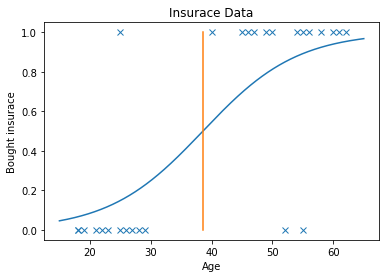

In [152]:
theta = BGD(x_list,y_list,[0,0],0.0001,0.000001)

#plot of hypothesis function
x = np.linspace(15,65,10000) 

y_lst = []
for val in x:
    y_val = hypot(theta,[1,val])
    y_lst.append(y_val)

y = np.array(y_lst)

plt.plot(x,y)

#plot of decision boundary
y_new = np.linspace(0,1,1000)

x_lst = []
for val in y_new:
    x_val = (-1)*(theta[0]/theta[1])
    x_lst.append(x_val)

x_new = np.array(x_lst)

plt.plot(x_new,y_new)

#plot of training data
plt.scatter(x_arr,y_arr,marker='x',linewidths=1)
plt.xlabel("Age")
plt.ylabel("Bought insurace")
plt.title("Insurace Data")

Binary Classifier for two feature input data

In [153]:
# Importing data from CSV File

data = pd.read_csv('data.csv', sep=',', names=['X1','X2','Y'])
data = data.drop(0,axis=0)
print(data)

                     X1                   X2    Y
1     3.269556155197803   2.1708352012763337  0.0
2     2.499932466052602   3.6624371937358857  0.0
3      3.47376824319743    1.834280274394953  0.0
4    0.6739613602104269  0.05174339509949011  0.0
5    3.7886821016353376    2.736997108003126  0.0
..                  ...                  ...  ...
196   4.768999749419443    4.335008813243956  1.0
197   3.067704740041784   3.6855445576185444  1.0
198   4.702615760792071    3.446340825089064  1.0
199    2.36472916890793    2.770822036783911  1.0
200  1.9984303449084235   3.5245618317639167  1.0

[200 rows x 3 columns]


In [154]:
m = len(data)
print(m)  # number of training examples
n = data.loc[1].size  
print(n)   # number of parameters

# Creating numpy-arrays

x0 = np.ones((1,m))
x1 = np.array(data['X1'],dtype='float').reshape(1,m)
x2 = np.array(data['X2'],dtype='float').reshape(1,m)
y = np.array(data['Y'],dtype='float').reshape(1,m)

x = np.vstack((x0,x1,x2))
x_t = np.hstack((np.transpose(x0),np.transpose(x1),np.transpose(x2)))

200
3


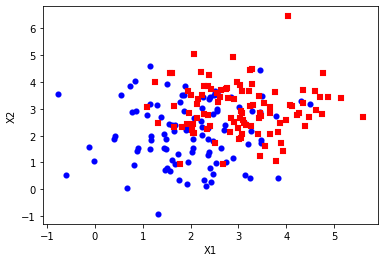

In [155]:
#plot of training data

x1_0 = []
x2_0 = []
x1_1 = []
x2_1 = []


for i in range(m):
    if (y[0][i]==0.0):
        x1_0.append(x1[0][i])
        x2_0.append(x2[0][i])
    else:
        x1_1.append(x1[0][i])
        x2_1.append(x2[0][i])


plt.scatter(x1_0,x2_0,marker='o',linewidths=0.1,c='blue')
plt.scatter(x1_1,x2_1,marker='s',linewidths=0.1,c='red')
plt.xlabel("X1")
plt.ylabel("X2")

plt.show()

Batch Gradient Ascent

In [156]:
# Hypothesis function

def hypot(theta,x_i):
    n = len(theta)     # number of parameters
    ans = 0
    for j in range(n):
        ans+= theta[j]*x_i[j]
    ans = (-1)*ans
    return (1/(1+exp(ans)))

In [157]:
# Log-likelihood function

def log_likelihood(theta,x_data_t,y_data):
    m = len(y_data[0])    #number of training examples
    ll = 0
    for i in range(m):
        h_theta_xi = hypot(theta[0],x_data_t[i])
        ll += (y_data[0][i])*log(h_theta_xi) + (1 - y_data[0][i])*log(1 - h_theta_xi)
    return ll

In [158]:
# Function definition of Batch Gradient Descent implementation

def BGD(x_data,x_data_t,y_data,theta,learning_rate,precision_value):
    n = len(x_data)    #number of parameters 
    m = len(y_data[0])    #number of training examples
    
    while True:
        ll_before = log_likelihood(theta,x_data_t,y_data)

        for j in range(n):  # iterating over all parameters
            grad=0
            for i in range(m):  # iterating over all training examples
                grad += ((y_data[0][i] - hypot(theta[0],x_data_t[i]))*(x_data[j][i]))
            theta[0][j] = theta[0][j] + learning_rate*grad

        ll_after = log_likelihood(theta,x_data_t,y_data)

        if (abs(ll_before-ll_after)<precision_value):  # convergence condition
            break

    return theta[0]

Plotting decision boundary and training data

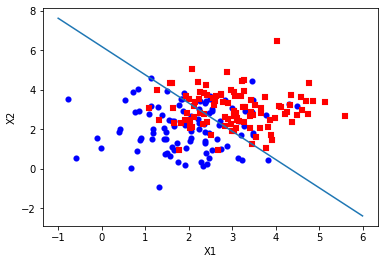

In [159]:
theta = BGD(x, x_t, y, np.zeros((1,n)), 0.008, 0.00000001)

#plot of decision boundary
x_pts = np.linspace(-1,6,10000) 

y_lst = []
for val in x_pts:
    y_val = (-1)*((theta[0]/theta[2]) + (theta[1]/theta[2])*val)
    y_lst.append(y_val)

y_pts = np.array(y_lst)

plt.plot(x_pts,y_pts)

#plot of training data

plt.scatter(x1_0,x2_0,marker='o',linewidths=0.1,c='blue')
plt.scatter(x1_1,x2_1,marker='s',linewidths=0.1,c='red')

plt.xlabel("X1")
plt.ylabel("X2")

plt.show()